In [1]:
import sys
sys.path.append("/mnt/d/00_SARDARCHITECTLABS/projects/fscoreai-ml/")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Multi-Dimensional Data

In [2]:
from fscoreai.utils import utils

In [4]:
X, y = utils.get_data(name='kc_house_data')
print(X.shape, y.shape)

(21613, 2) (21613,)


## Using sklearn for testing

In [5]:
from sklearn.linear_model import LinearRegression

In [65]:
model_sklearn = LinearRegression(fit_intercept=True)
model_sklearn.fit(X,y)
print(model_sklearn.coef_, model_sklearn.intercept_)

[   313.94868588 -57066.75892292] 79469.35907477367


## Fscore AI Library Model

In [109]:
class MultiLinearRegression():
    def __init__(self):
        pass
        
    def fit(self, X, y, fit_type = 'stat', lr=1e-8, epochs=50):
        n, d = X.shape[0], X.shape[1]
        self.coef_ = np.zeros(d)
        self.intercept_ = 0        
        if (fit_type == 'stat'):    #Evaluate closed-form solution
            X = np.hstack((np.ones((X.shape[0],1)), X))
            beta = np.linalg.inv(np.dot(X.T, X)).dot(np.dot(X.T,y))
            self.intercept_ = beta[0]
            self.coef_ = beta[1:]
            return self

        if (fit_type == 'grad'): # Evaluate gradient descent solution:
            n, d = X.shape[0], X.shape[1]
            self.coef_ = np.zeros(d)
            self.intercept_ = 0        
            self.lr = lr  #   Learning rate
            self.epochs = epochs
            
            for epoch in range(self.epochs):
                for j in range(d):
                    x = X[:, j]
                    y_pred = np.dot(x, self.coef_[j]) + self.intercept_
            return self

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

model_fscore_1 = MultiLinearRegression()
model_fscore_1.fit(X,y, fit_type='stat')
print(model_fscore_1.coef_, model_fscore_1.intercept_)

In [110]:
model_fscore_2 = MultiLinearRegression()
model_fscore_2.fit(X, y, fit_type='grad', lr=1e-11, epochs=10000)
print(model_fscore_2.coef_, model_fscore_2.intercept_)

[106.20121138   0.19258316] 0.09602692116545637


## Plotting the models

In [30]:
preds_sklearn = model_sklearn.predict(X)
preds_fscore_1 = model_fscore_1.predict(X)
preds_fscore_2 = model_fscore_2.predict(X)

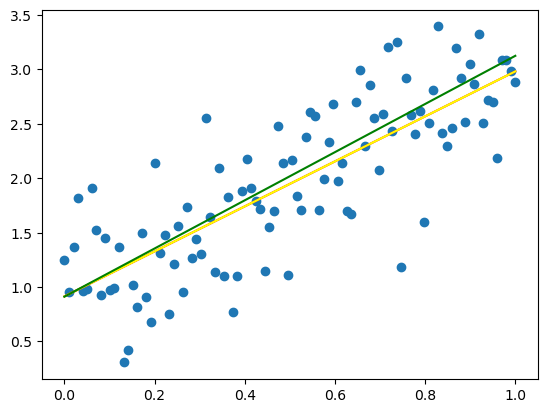

In [31]:
plt.scatter(X, y)
plt.plot(X, preds_sklearn, color='red')
plt.plot(X, preds_fscore_1, color='yellow')
plt.plot(X, preds_fscore_2, color='green')